### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


In [10]:
url='https://covid19.ncdc.gov.ng/'
page=requests.get(url)

In [11]:
soup=BeautifulSoup(page.text,'lxml')

In [12]:
# Finding the table for extraction
table=soup.find('div', {'class':'table-responsive'})

In [13]:
# Extracting the header
headers=[]
for i in table.find_all('th'):
    title=i.text
    headers.append(title)

In [14]:
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Save the data to a DataFrame object.
df=pd.DataFrame(columns=headers)

In [16]:
for row in table.find_all('tr')[1:]:
    data=row.find_all('td')
    row_data=[td.text.strip() for td in data]
    length=len(df)
    df.loc[length]=row_data

In [17]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,157","1,014","102,372",771
1,FCT,"29,504",15,"29,240",249
2,Rivers,"18,093",44,"17,894",155
3,Kaduna,"11,615",12,"11,514",89
4,Oyo,"10,336",2,"10,132",202


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [3]:
# Extracting data from the UrL
url=(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df1 = pd.read_csv(url)

In [4]:
url=('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv?raw=True')
df2 = pd.read_csv(url)

In [5]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df3 = pd.read_csv(url)

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [44]:
# Extracting data from the Github Url
url='https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/Budget%20data.csv?raw=True'
budget = pd.read_csv(url)

In [3]:
url='https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/RealGDP.csv?raw=True'
real = pd.read_csv(url)

In [18]:
url='https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covid_external.csv?raw=True'
covid=pd.read_csv(url)

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [20]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,157","1,014","102,372",771
1,FCT,"29,504",15,"29,240",249
2,Rivers,"18,093",44,"17,894",155
3,Kaduna,"11,615",12,"11,514",89
4,Oyo,"10,336",2,"10,132",202


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [19]:
# first remove the comma
df = df.replace(',','', regex=True)

In [20]:
# rename the columns
df.rename(columns={'No. of Cases (on admission)':'Cases_on_admission'},inplace=True)
df.rename(columns={'No. Discharged': 'Discharged'},inplace=True)
df.rename(columns={'No. of Deaths': 'Deaths'},inplace=True)
df.rename(columns={'No. of Cases (Lab Confirmed)':'Cases_lab_confirmed'},inplace=True)
df.rename(columns={'States Affected':'states'},inplace=True)

In [21]:
# change the object columns to numeric
df[["Cases_lab_confirmed", "Cases_on_admission","Discharged","Deaths"]] = \
df[["Cases_lab_confirmed", "Cases_on_admission","Discharged","Deaths"]].apply(pd.to_numeric,errors='ignore')

In [22]:
# view new data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   Cases_lab_confirmed  37 non-null     int64 
 2   Cases_on_admission   37 non-null     int64 
 3   Discharged           37 non-null     int64 
 4   Deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [6]:
# Extractintg the desired data
nig_conf=df1[df1['Country/Region']=="Nigeria"]

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [7]:
# Extractintg the desired data
nig_recov=df2[df2['Country/Region']=="Nigeria"]

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [8]:
# Extractintg the desired data
nig_death=df3[df3['Country/Region']=="Nigeria"]

### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [34]:
conf_case=df.groupby('states')['Cases_lab_confirmed'].sum()
conf_cases=conf_case.reset_index().sort_values('Cases_lab_confirmed',ascending=False)
conf_cases=conf_cases[:10]

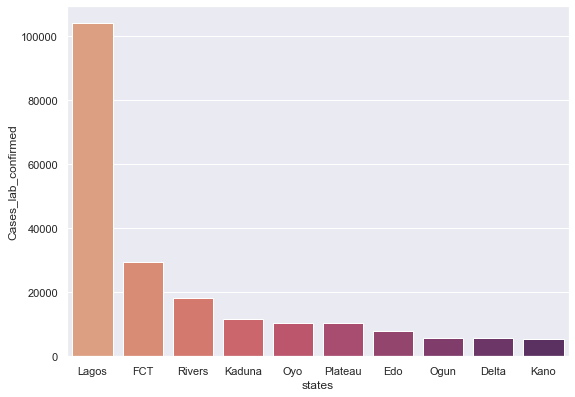

In [36]:
sns.barplot(x='states',y='Cases_lab_confirmed',data=conf_cases,palette = 'flare')
sns.set(rc = {'figure.figsize':(8,6)})

Lagos has the highest number of confirmed cases this could be due to the state being overpopulated

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [35]:
dis_case=df.groupby('states')['Discharged'].sum()
dis_case=dis_case.reset_index().sort_values('Discharged',ascending=False)
dis_case=dis_case[:10]

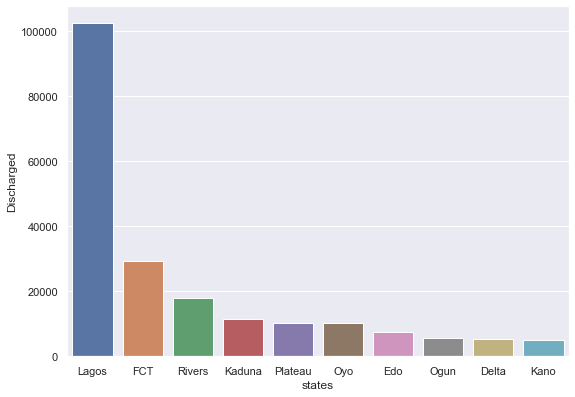

In [38]:
sns.barplot(x='states',y='Discharged',data=dis_case)
sns.set(rc = {'figure.figsize':(8,6)})

Lagos also has the highest number of discharged patients, propably due to its economical status which translate to its health sector

TODO D - Plot the top 10 Death cases

In [39]:
deaths=df.groupby('states')['Deaths'].sum()
deaths=deaths.reset_index().sort_values('Deaths',ascending=False)
deaths=deaths[:10]

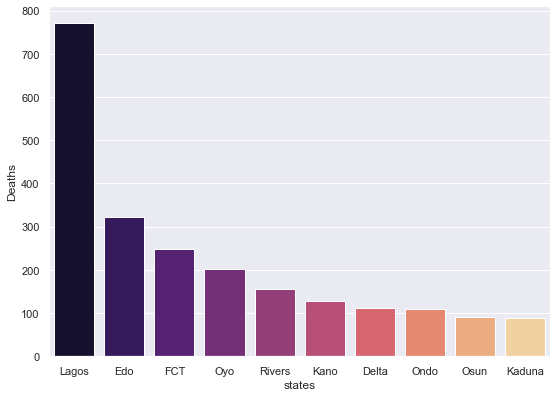

In [41]:
sns.barplot(x='states',y='Deaths',data=deaths,palette = 'magma')
sns.set(rc = {'figure.figsize':(8,6)})

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [9]:
# Dropping unwanted columns and then transposing data frame 
nig_confz=nig_conf.drop(columns=(['Province/State','Lat','Long'])).T.reset_index().drop(0).rename(columns={'index':'Date',206:'count'})

In [10]:
# changing the date column to datetime 
nig_confz['Date'] = pd.to_datetime(nig_confz['Date']).dt.date

In [11]:
# setting the date column as index
nig_confz=nig_confz.set_index('Date')

In [12]:
# Dropping unwanted columns and the transposing data frame 
nig_recovs=nig_recov.drop(columns=(['Province/State','Lat','Long'])).T.reset_index().drop(0).rename(columns={'index':'Date',191:'count'})

In [13]:
# changing the date column to datetime 
nig_recovs['Date']= pd.to_datetime(nig_recovs['Date']).dt.date

In [14]:
# setting the date column as index
nig_recovs=nig_recovs.set_index('Date')

In [15]:
# Dropping unwanted columns and the transposing data frame 
nig_deaths=nig_death.drop(columns=(['Province/State','Lat','Long'])).T.reset_index().drop(0).rename(columns={'index':'Date',206:'count'})

In [16]:
# changing the date column to datetime
nig_deaths['Date']=pd.to_datetime(nig_deaths['Date']).dt.date

In [17]:
# setting the date column as index
nig_deaths=nig_deaths.set_index('Date')

In [18]:
# There seems to be differences between the three data, so we modify in a way that all those values fall into the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# since we have a datetime index we will be scaling only the count column 
nig_confz['count'] = scaler.fit_transform(nig_confz['count'].to_numpy().reshape(-1, 1))
nig_recovs['count']= scaler.fit_transform(nig_recovs['count'].to_numpy().reshape(-1, 1))
nig_deaths['count'] = scaler.fit_transform(nig_deaths['count'].to_numpy().reshape(-1, 1))

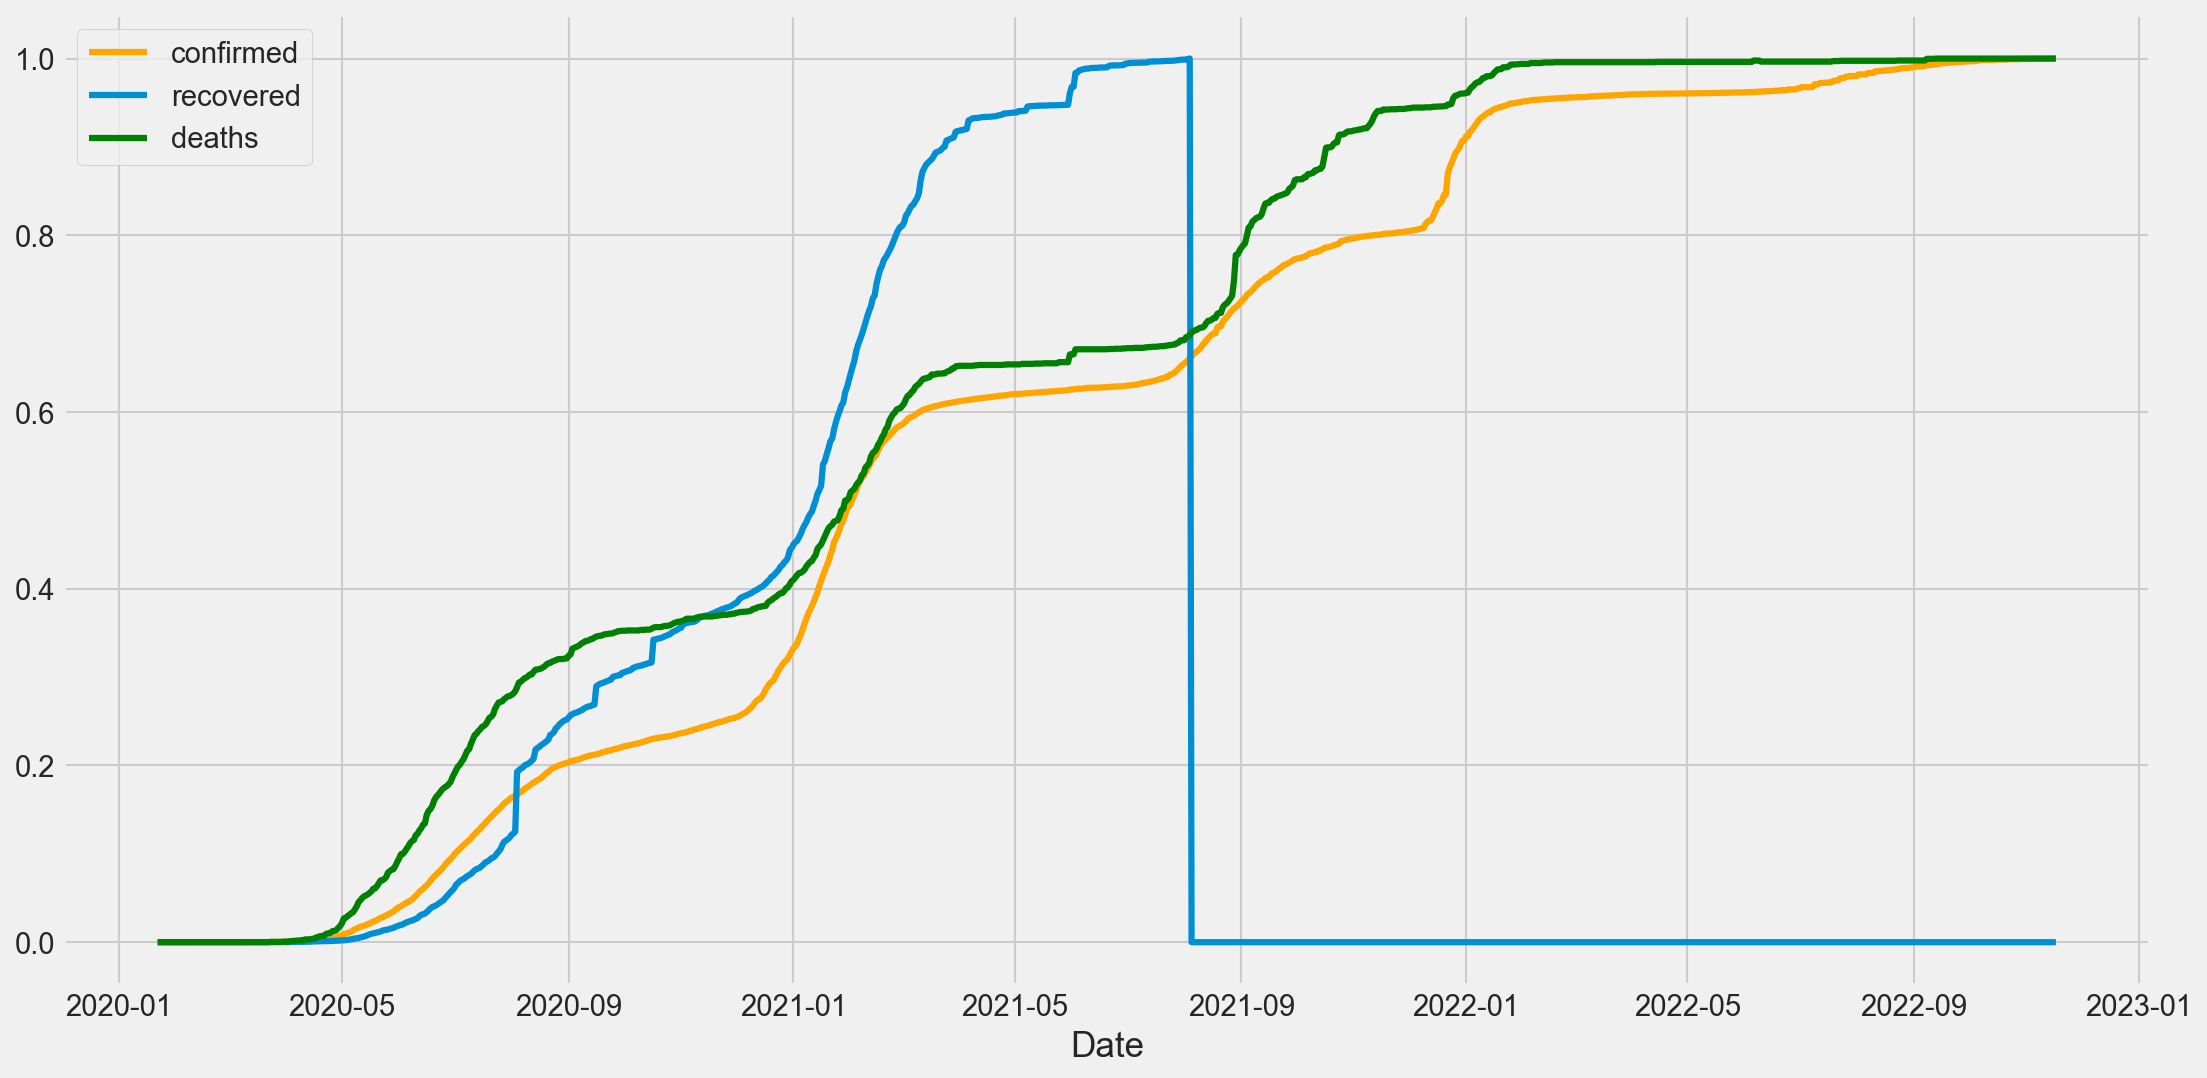

In [26]:
plt.figure(figsize=(16, 8), dpi=150)
  
# in plot method we set the label and color of the curve.
nig_confz['count'].plot(label='confirmed', color='orange', linewidth=3)
nig_recovs['count'].plot(label='recovered',linewidth=3)
nig_deaths['count'].plot(label='deaths',color='green',linewidth=3)

# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [25]:
# get a copy of the data
nig_confs=nig_confz.copy()

In [28]:
nig_confs=nig_confs.diff()

<AxesSubplot:xlabel='Date'>

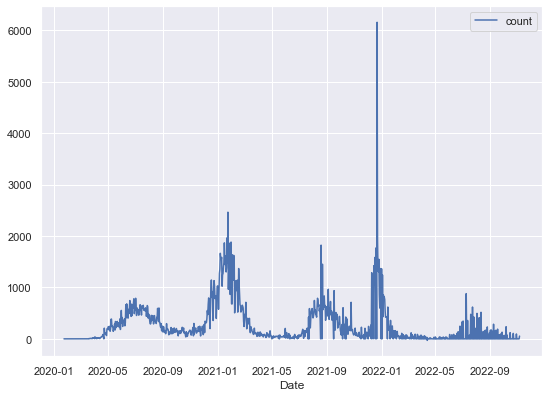

In [38]:
nig_confs.plot(kind='line')

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [40]:
max=nig_confs['count'].max()

In [41]:
nig_confs[nig_confs['count']==max]

,count
Date,
2021-12-22,6158


The maximum infection rate for a day is 6158, 
the date is 2021-12-22

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [36]:
# View the external dataset and note the common column
covid.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [23]:
combined=pd.merge(df, covid, on='states')
combined.head()

,states,Cases_lab_confirmed,Cases_on_admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104157,1014,102372,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29504,15,29240,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18093,44,17894,155,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11615,12,11514,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10336,2,10132,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [24]:
combined_10=combined.sort_values('Cases_lab_confirmed', ascending=False).nlargest(10,'Cases_lab_confirmed')

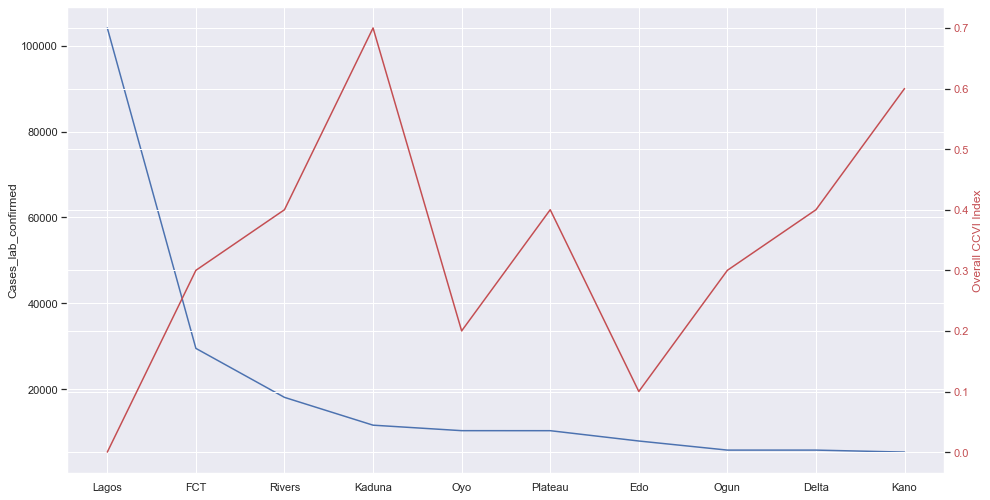

In [52]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(combined_10['states'],combined_10['Cases_lab_confirmed'])
ax1.set_ylabel('Cases_lab_confirmed')

ax2 = ax1.twinx()
ax2.plot(combined_10['states'],combined_10['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

### SUMMARY
Albeit lagos having the lowest Community Vulnerability Index it had the highest confirmed cases and in the top 10, kaduna and kano have the higher Community Vulnerability index but their number of confirmed cases is very low compared to other states with lower Community Vulnerability index 

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='Cases_lab_confirmed', ylabel='Population Density'>

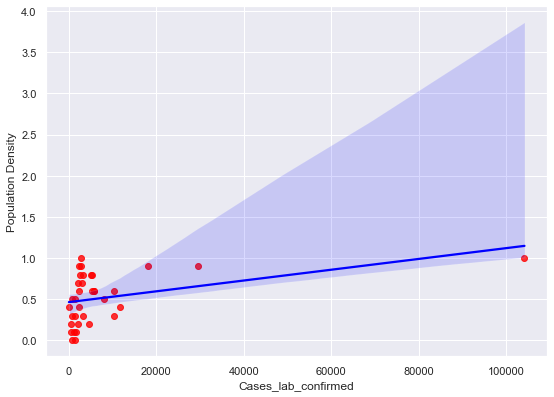

In [59]:
sns.regplot(data=combined, x='Cases_lab_confirmed', y='Population Density',scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

### SUMMARY
Looking at the regression plot above, there is a correlation between population density and confirmed cases.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [79]:
regional=combined.groupby('region')[['Age','Deaths']].sum()

In [80]:
regional

,Age,Deaths
region,,
North Central,1.9,435
North East,2.5,215
North West,1.5,324
South East,4.5,184
South South,3.8,649
South West,3.7,1284


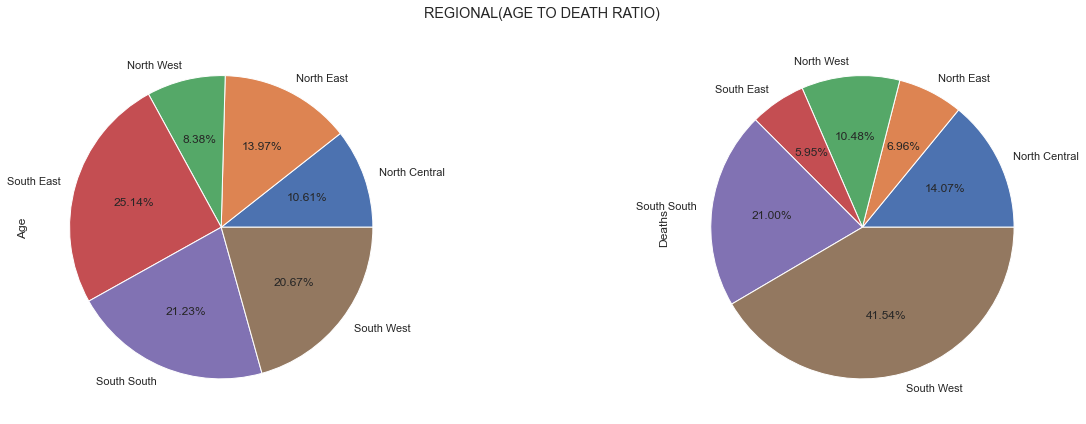

In [149]:
regional[['Age','Deaths']].plot(kind ='pie', subplots = True, figsize = (20,6), 
                                                           autopct = '%2.2F%%', labels = regional.index, 
                                                           legend = False)
plt.suptitle('REGIONAL(AGE TO DEATH RATIO)')
plt.tight_layout()

### SUMMARY
The outbreak was more severe on the older demographic according to statistics and information about the virus , these pie plots show a certain correlation.

In [41]:
region=combined.groupby('region')[['Discharged','Health System']].sum()

In [42]:
regions=region.reset_index()

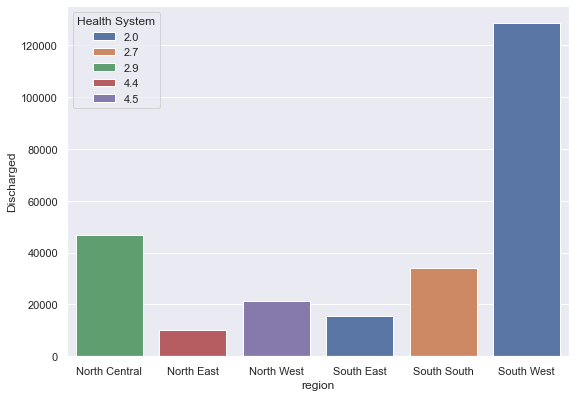

In [47]:
sns.barplot(data=regions, x='region', y='Discharged',hue='Health System', dodge=False)
sns.set(rc = {'figure.figsize':(8,6)})

### SUMMARY
There is a correlation betweeen the level of each regions health system and how many patients could be taken care of and discharged as the regions with better health care systems discharged more patients.. taking into the account that the lower the value the better the health system

In [53]:
reg=combined.groupby('region')[['Cases_lab_confirmed','Epidemiological','Fragility']].sum().reset_index()

<AxesSubplot:xlabel='region', ylabel='Cases_lab_confirmed'>

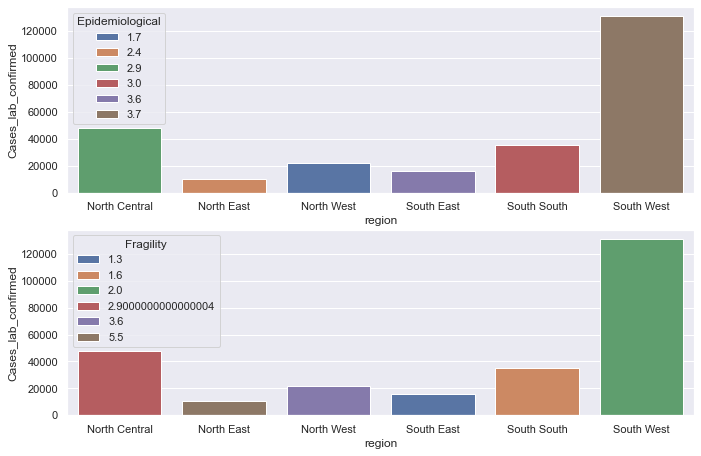

In [67]:
# PLOTTING A VERTICAL SUBPLOT OF THE TWO VARIABLE TO CHECK FOR CORRELATION
fig, axs = plt.subplots(2,figsize=(10,7))
sns.barplot( x='region',y='Cases_lab_confirmed',hue='Epidemiological' ,data=reg,ax=axs[0],dodge=False)
sns.barplot(x='region',y='Cases_lab_confirmed',hue='Fragility', data=reg,ax=axs[1],dodge=False)


### SUMMARY 
There is a correlation between Epidemiology status of each region with the number of confirmed cases in each region

But there isnt much correlation between Fragility of each region with the number of confirmed cases in each region

In [69]:
# Analyzing the areas with the least infection rates
combined_ten=combined.sort_values('Cases_lab_confirmed', ascending=False).nsmallest(10,'Cases_lab_confirmed')

In [70]:
combined_ten

,states,Cases_lab_confirmed,Cases_on_admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
34,Kogi,5,0,3,2,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
33,Zamfara,375,0,366,9,North West,4974000,0.9,0.2,0.1,0.7,0.8,0.2,1.0,0.9,0.87
32,Kebbi,480,10,454,16,North West,4968000,0.8,0.2,0.3,0.4,0.9,0.1,0.9,0.9,0.85
31,Yobe,638,4,625,9,North East,3723000,1.0,0.6,0.3,1.0,0.5,0.0,0.9,1.0,0.87
30,Jigawa,669,2,649,18,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92
29,Sokoto,822,0,794,28,North West,5612000,0.9,0.3,0.2,0.4,0.7,0.3,1.0,1.0,0.89
28,Niger,1183,165,998,20,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
27,Adamawa,1312,134,1140,38,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94
26,Bayelsa,1368,5,1335,28,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00
25,Taraba,1492,52,1406,34,North East,3387000,0.8,0.6,0.8,0.9,0.5,0.0,0.7,0.9,0.86


In [75]:
combined_ten.describe(include='all')

,states,Cases_lab_confirmed,Cases_on_admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,10,10.000000,10.000000,10.000000,10.000000,10,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
unique,10,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kogi,NaN,NaN,NaN,NaN,North West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,834.400000,37.200000,777.000000,20.200000,NaN,4.760700e+06,0.730000,0.390000,0.370000,0.590000,0.680000,0.240000,0.740000,0.820000,0.891000
std,NaN,489.606009,61.636569,447.178562,11.707547,NaN,1.225772e+06,0.266875,0.237814,0.262679,0.296086,0.154919,0.189737,0.279682,0.147573,0.049092
min,NaN,5.000000,0.000000,3.000000,2.000000,NaN,2.606000e+06,0.100000,0.000000,0.000000,0.100000,0.500000,0.000000,0.200000,0.600000,0.840000
25%,NaN,519.500000,0.500000,496.750000,10.750000,NaN,3.960250e+06,0.650000,0.225000,0.200000,0.400000,0.525000,0.100000,0.700000,0.725000,0.862500
50%,NaN,745.500000,4.500000,721.500000,19.000000,NaN,4.969000e+06,0.800000,0.350000,0.300000,0.600000,0.700000,0.250000,0.850000,0.850000,0.870000
75%,NaN,1279.750000,41.500000,1104.500000,28.000000,NaN,5.452500e+06,0.900000,0.575000,0.600000,0.850000,0.775000,0.375000,0.900000,0.900000,0.912500


There isnt much correlation to be extracted from these results , the populations and confirmed cases dont really tell a story

<AxesSubplot:xlabel='states', ylabel='Cases_lab_confirmed'>

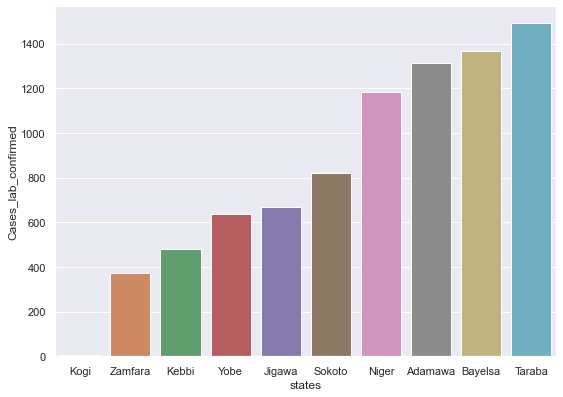

In [76]:
sns.barplot(x='states', y='Cases_lab_confirmed', data=combined_ten)

In [83]:
combined_ten.groupby('region')[['Cases_lab_confirmed','Socio-Economic',' Transport Availability']].sum()

,Cases_lab_confirmed,Socio-Economic,Transport Availability
region,,,
North Central,1188,1.1,1.4
North East,3442,2.3,2.5
North West,2346,3.8,3.6
South South,1368,0.2,0.7


### SUMMARY

From a quick analysis of this dataset containing the least infected states, there really isnt much information that sets these areas apart and support these low infection rate , apart from the fact that most of the states are situated in the north with only one south south state

If this dataset contained land ratio , a deduction can be made from the population to land mass ratio (Population density) , to see if these areas are sparsely populated , as these areas are not below the average population 




### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [4]:
realz=pd.melt(real,id_vars='Year',value_vars=['Q1', 'Q2', 'Q3','Q4'])

<Figure size 1440x576 with 0 Axes>

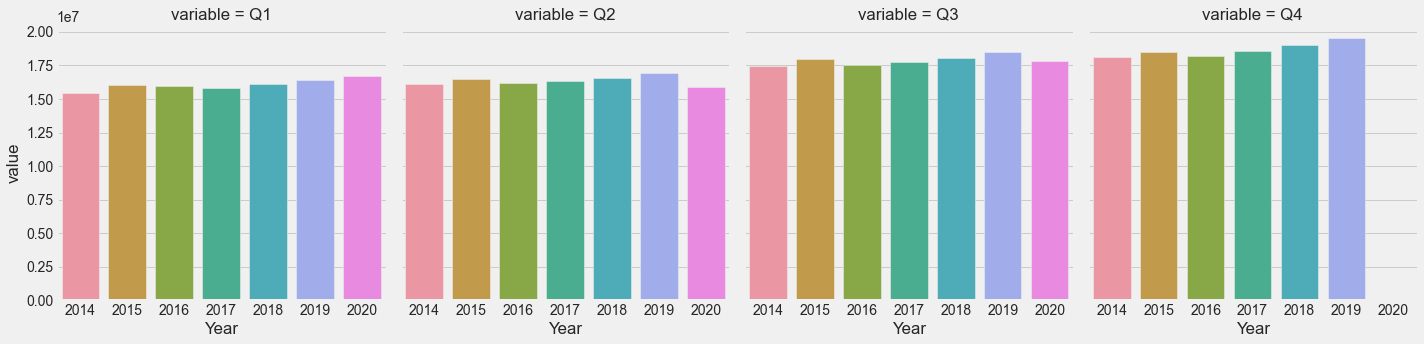

<Figure size 1440x576 with 0 Axes>

In [7]:
fig=sns.catplot(x = "Year",  y = "value", data = realz, kind = "bar",col='variable').fig
plt.figure(figsize=(20,8))


In [114]:
reals=real.set_index('Year')

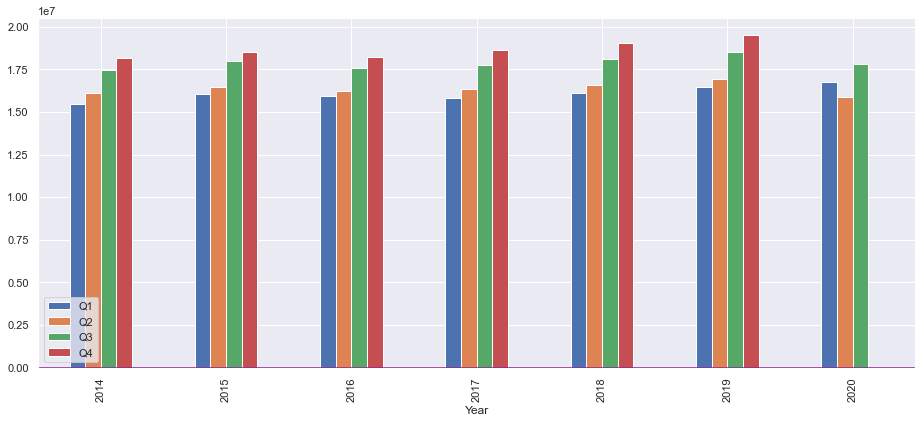

In [116]:
reals.plot(kind='bar',figsize = (14,6))
plt.legend(loc=3)
plt.axhline(1, color='purple', label='test')

### SUMMARY
There is a sharp decline in GDP in Q2 for 2020, which is very differnt from previous years , this must be due to the pandemic

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [103]:
# merging the Budget data withthe NCDC data for further analysis
Budgets=pd.merge(df, budget, on='states')

In [104]:
Budgets.head()

,states,Cases_lab_confirmed,Cases_on_admission,Discharged,Deaths,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,104157,1014,102372,771,1680.00,920.5
1,FCT,29504,15,29240,249,278.78,199.0
2,Rivers,18093,44,17894,155,530.80,300.4
3,Kaduna,11615,12,11514,89,259.25,223.6
4,Oyo,10336,2,10132,202,213.00,174.0


In [105]:
Budgets_10=Budgets.sort_values('Cases_lab_confirmed', ascending=False).nlargest(10,'Cases_lab_confirmed')

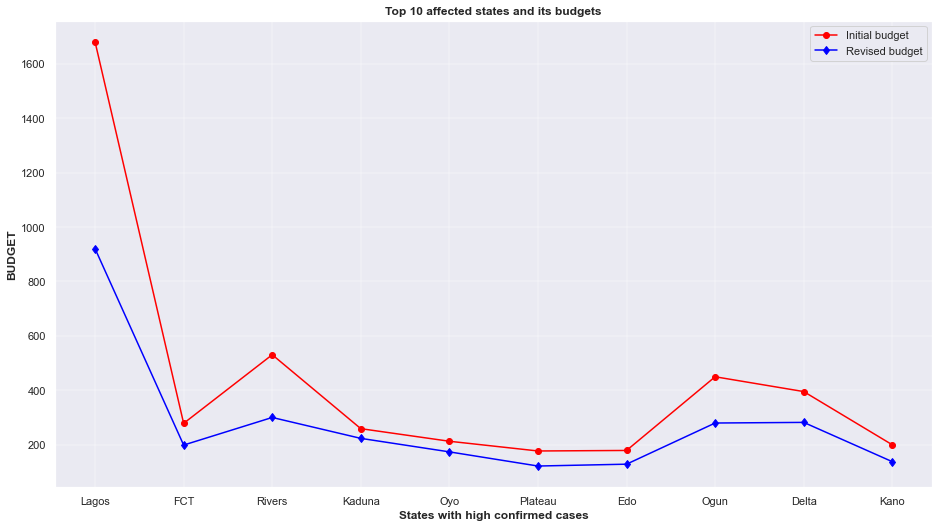

In [109]:
plt.figure(figsize = (14,8))
plt.plot(Budgets_10['states'],Budgets_10['Initial_budget (Bn)'],marker = 'o', label = 'Initial budget', color = 'red')
plt.plot(Budgets_10['states'],Budgets_10['Revised_budget (Bn)'],marker = 'd', label = 'Revised budget', color = 'blue')
plt.xlabel('States with high confirmed cases', weight = 'bold')
plt.legend()
plt.ylabel('BUDGET', weight= 'bold')
plt.title('Top 10 affected states and its budgets', weight= 'bold')
plt.grid(linewidth = 0.4)

### SUMMARY
From the plot above we can see that the outbreak caused most states to revise/ lower their budgets